# Лабораторная работа №2

Субботин Максим 9382

## Цель работы
Практическое применение дискретного преобразования Фурье c использованием библиотек Python для анализа речевых сигналов.

## Задачи

1. [Используя ДПФ построить траекторию основного тона (F0) на записи своего голоса.](#id1)
2. [Используя ДПФ построить траектории второй, третьей и четвертой формантных частот на записи своего голоса.](#id2)
3. [Построить сонограмму по записи своего голоса.](#id3)

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import spectrogram
from scipy.io import wavfile
import more_itertools as it

<ipython-input-10-82efd52faced>:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  freq_sample, sig_audio = wavfile.read("input.wav")


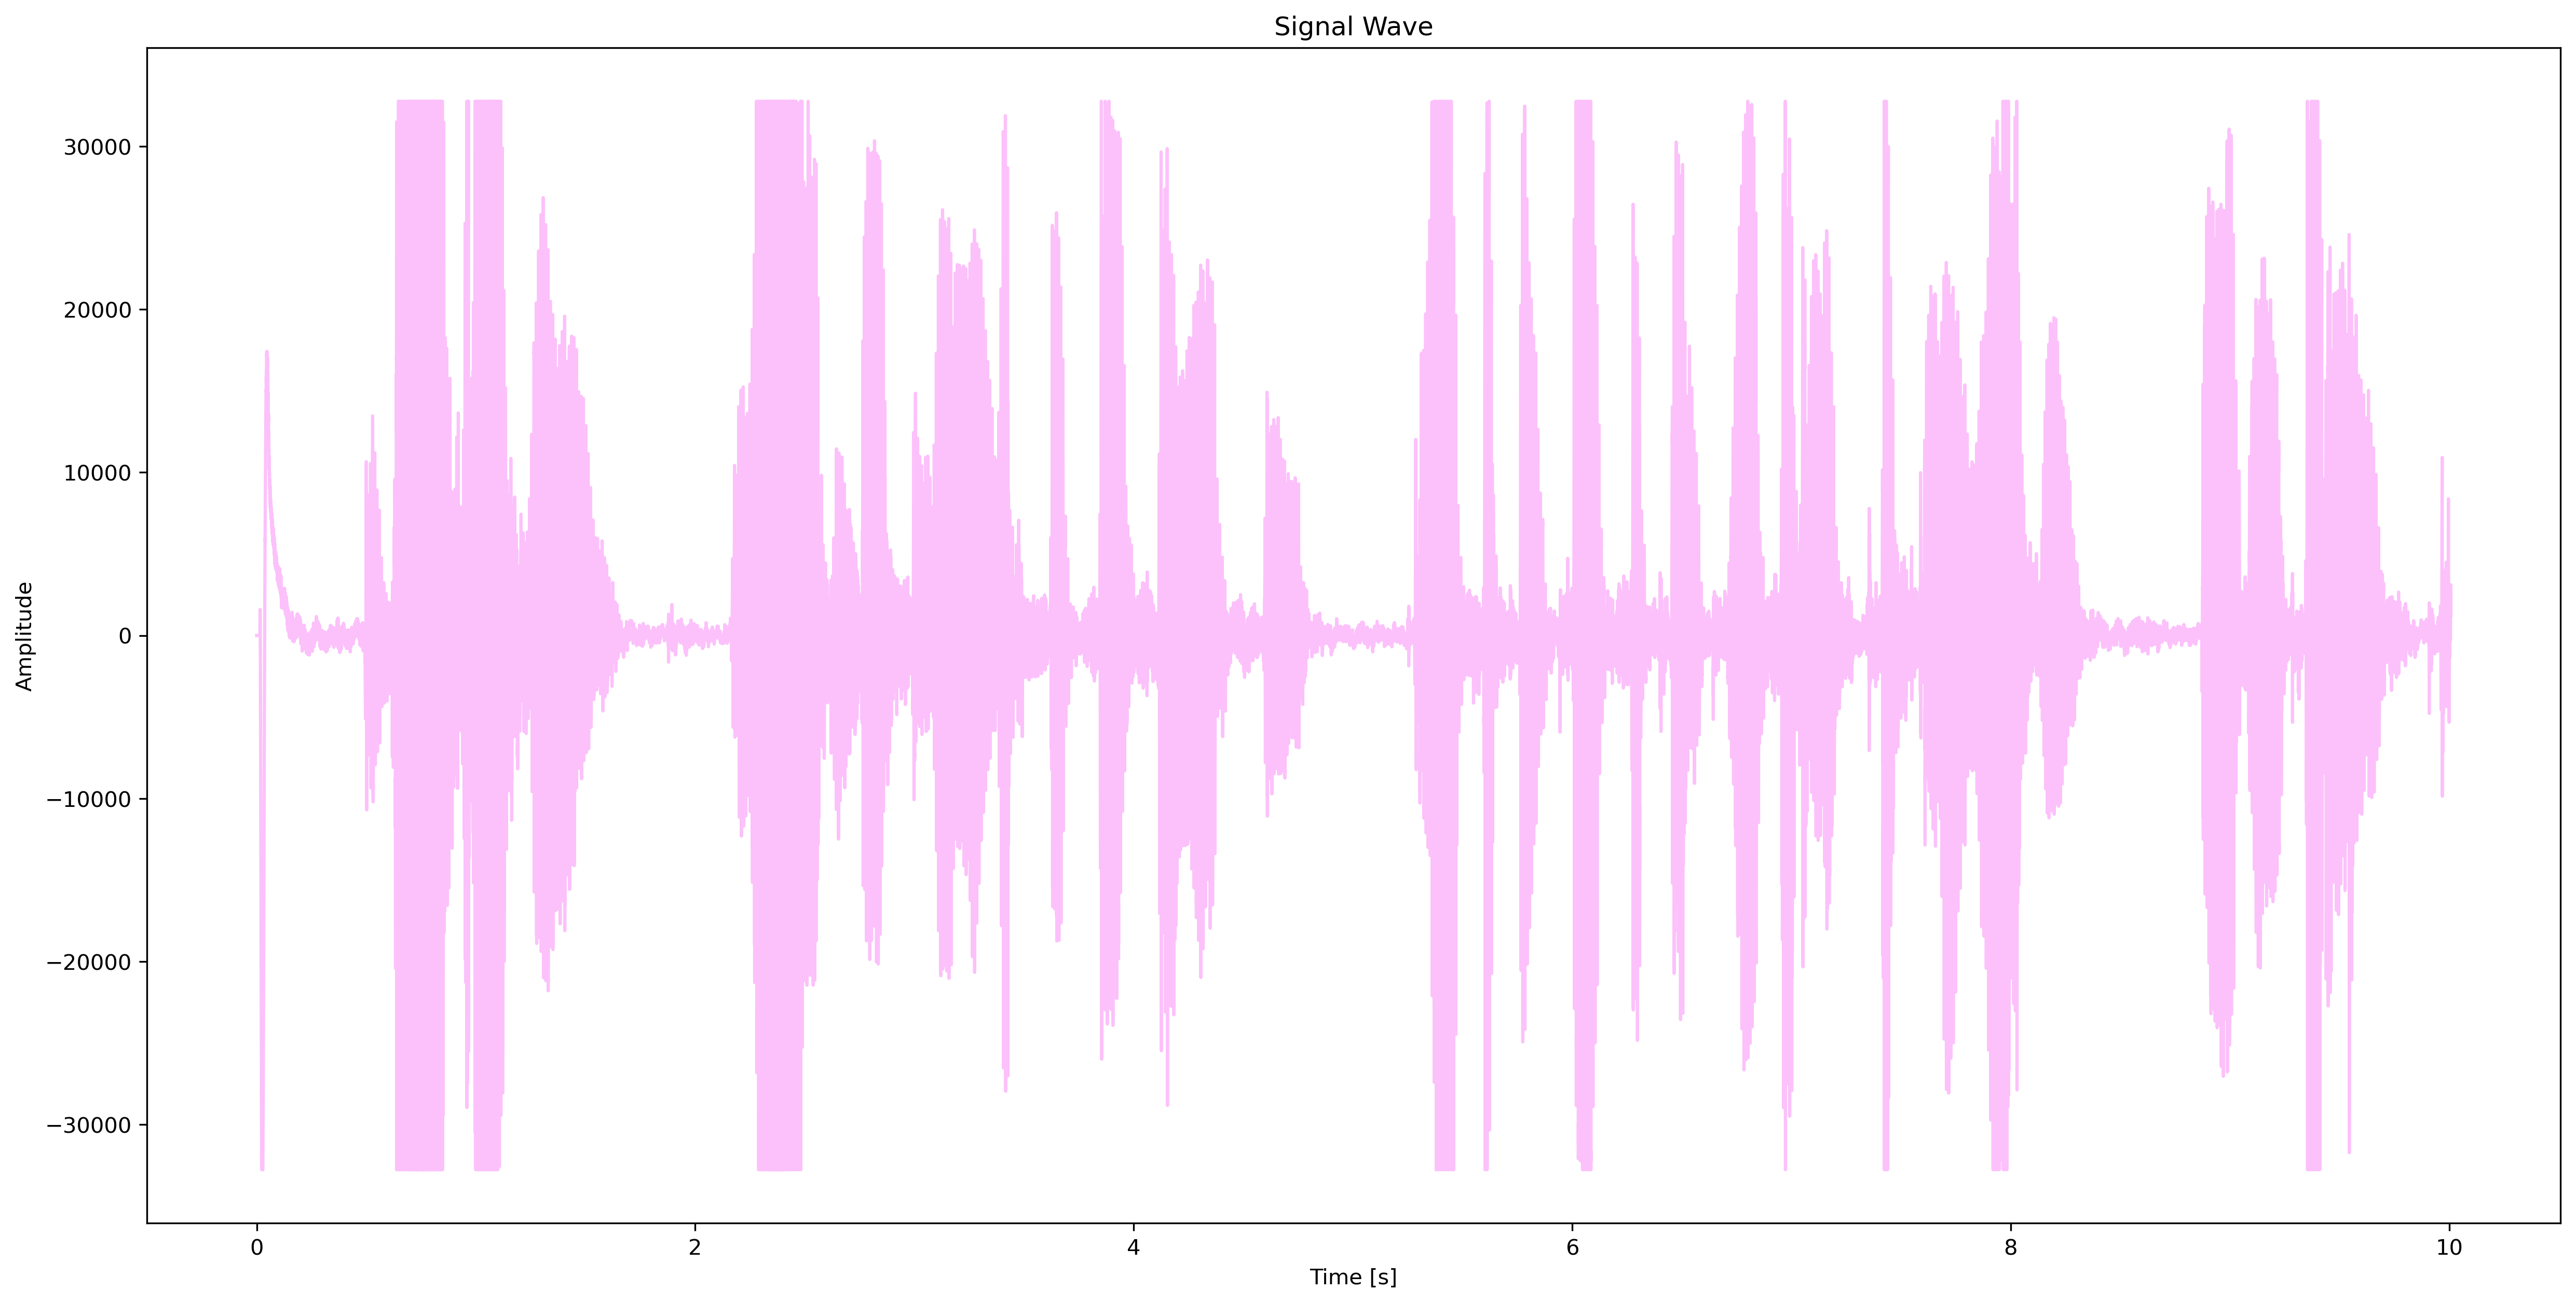

In [10]:
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams["figure.dpi"] = 300
freq_sample, sig_audio = wavfile.read("input.wav")

x_sig = np.linspace(0, len(sig_audio) / freq_sample, num=len(sig_audio))
plt.title("Signal Wave")
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
    
plt.plot(x_sig, sig_audio, color='#FCC1FB')



## <a name ="id1"> Используя ДПФ построить траекторию основного тона (F0) на записи своего голоса. </a>

Разбиваем сигнал на отрезки длинной N, сдвиг 0.25*N.

In [11]:
N = 256
intervals = list(it.windowed(sig_audio, n=N, step=int(0.25*N)))
intervals[-1] = [i for i in intervals[-1] if i]

На каждом отрезке сигнал предварительно умножаем на окно Блекмана-Харриса.

In [12]:
intervals = [i*np.blackman(len(i)) for i in intervals]

Вычисляем ДПФ:

In [13]:
def DFT(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N) 
    return np.dot(e, x)

dft_intervals = [DFT(i) for i in intervals]

На основне ДПФ вычисляем амплитудный спектр в интервале (0,N/2):

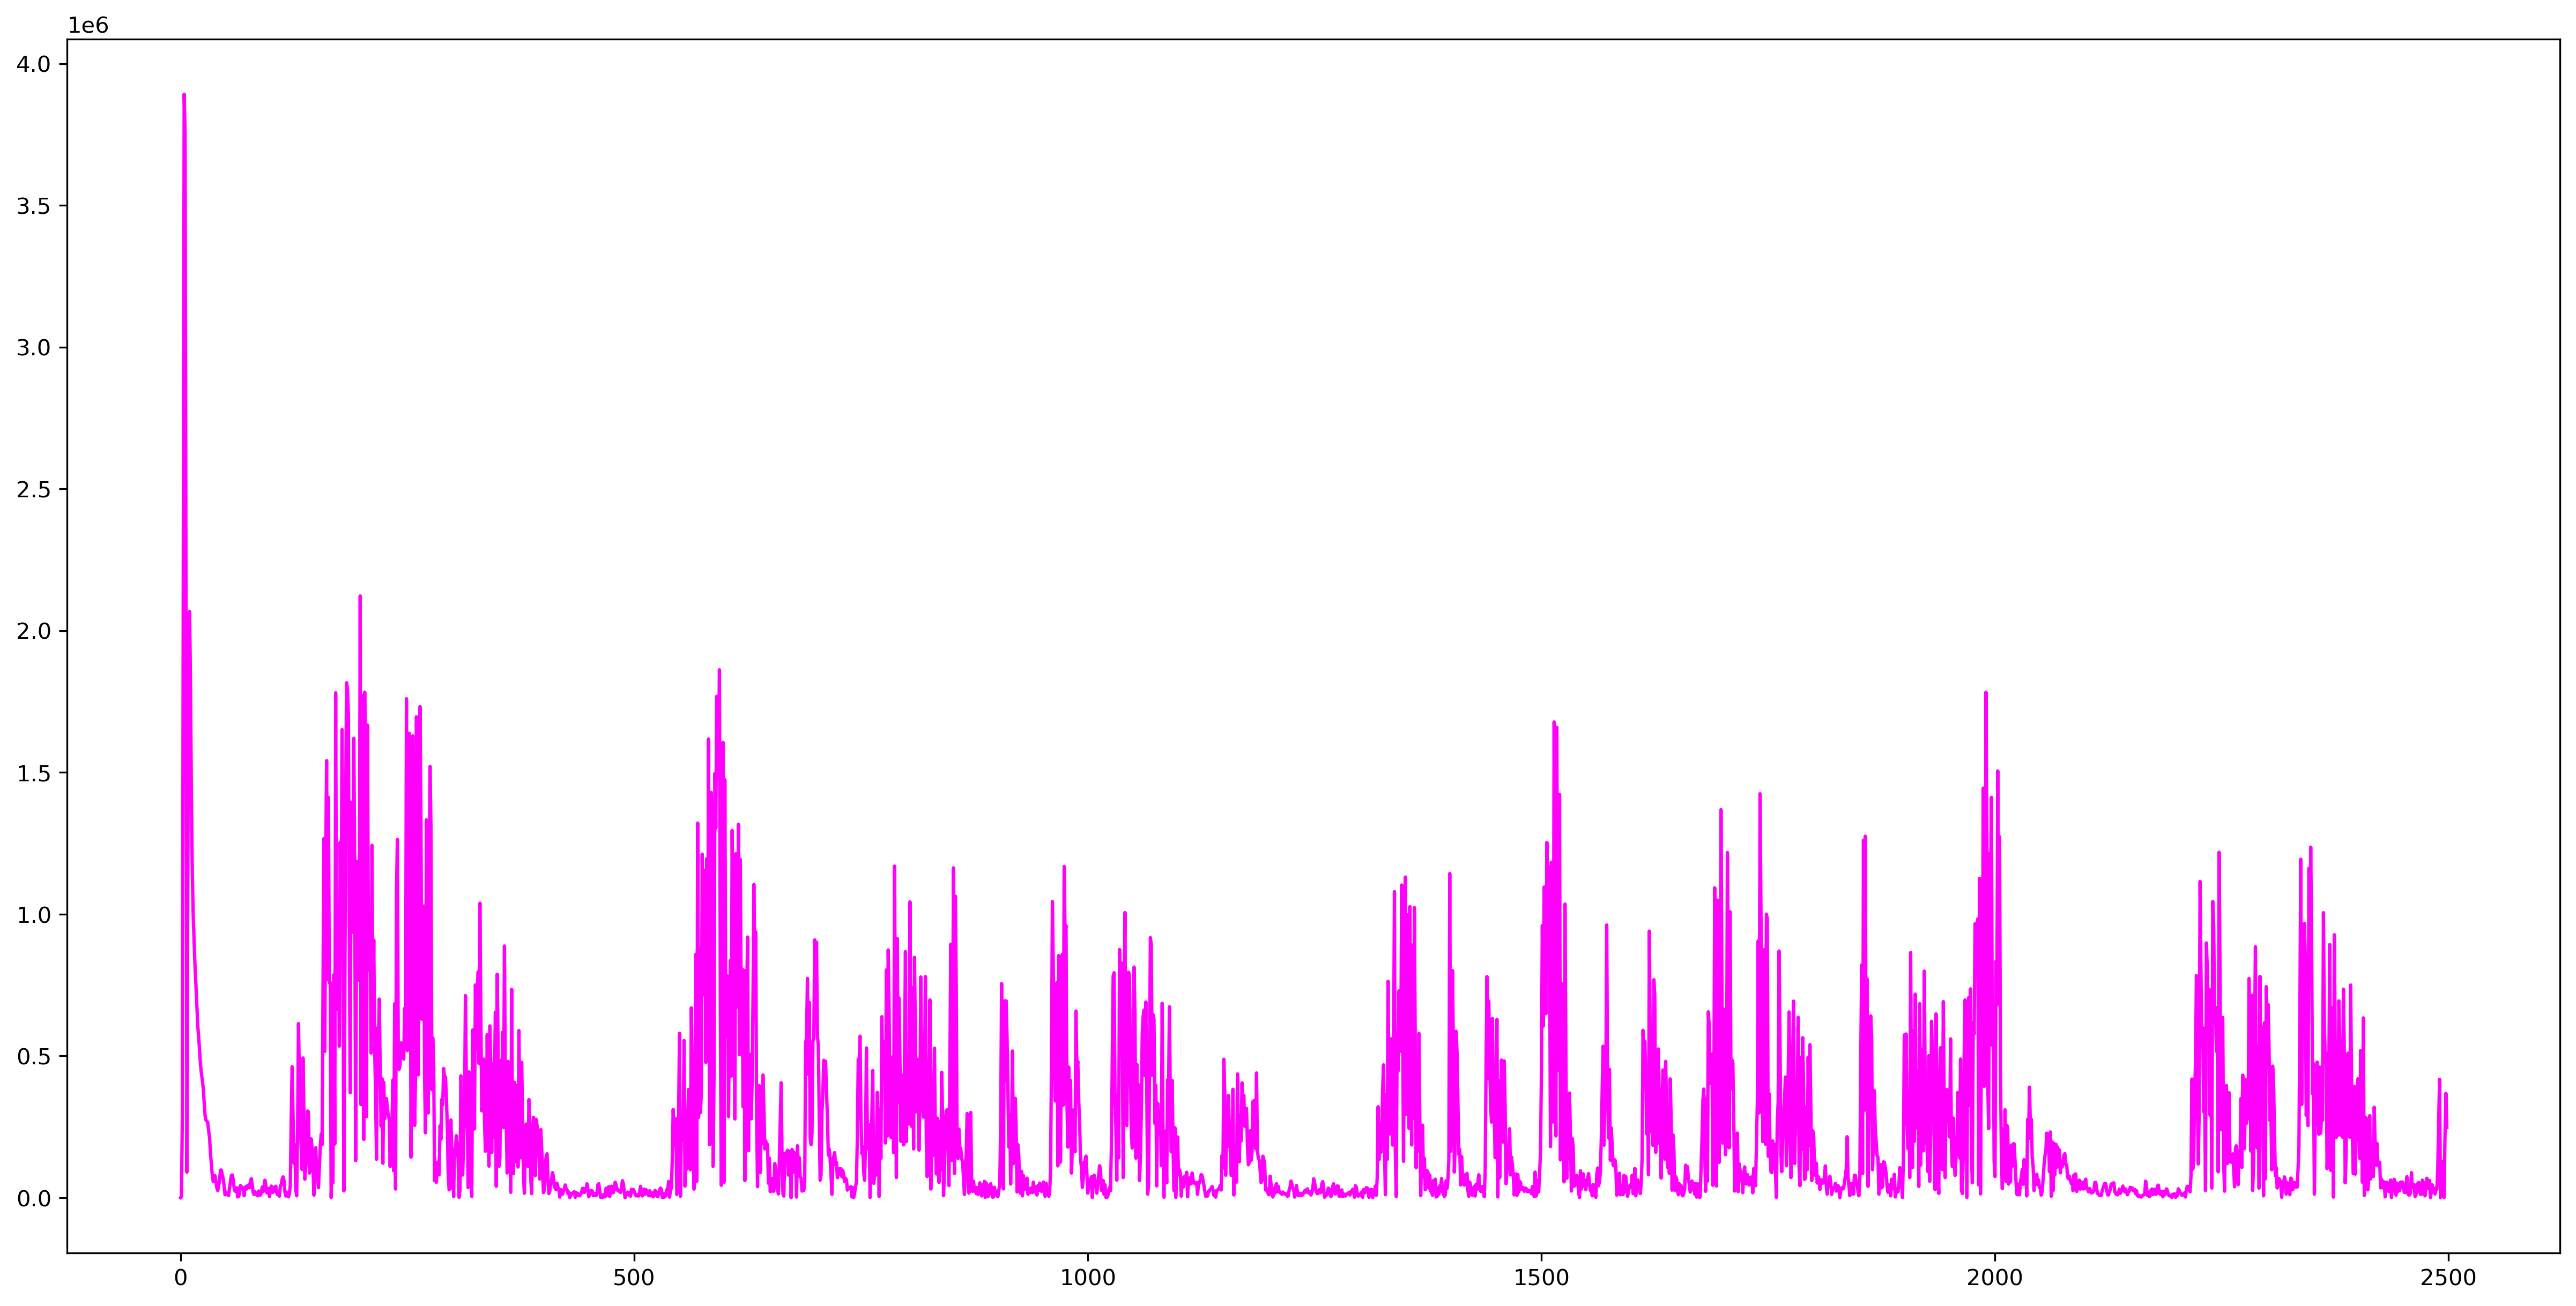

In [14]:
amplitude_spectrum = [(sum([j**2 for j in i[:int(len(i)/2)]])**0.5).real for i in dft_intervals]
plt.plot(amplitude_spectrum, color='#FF00FB')

Строим форманту F0:

In [29]:
F0 = []
arrs = list(it.windowed(amplitude_spectrum, n=round(freq_sample/N), step=round(freq_sample/N)))
arrs[-1] = [i for i in arrs[-1] if i]
for i in range(len(arrs)):
    arrs[i] = list(arrs[i])

for i in arrs:
    interval = np.array(i)
    if interval.max() > 1e6:            
        F0 += interval.tolist()
    else:
        F0 += [0 for i in range(len(interval))]

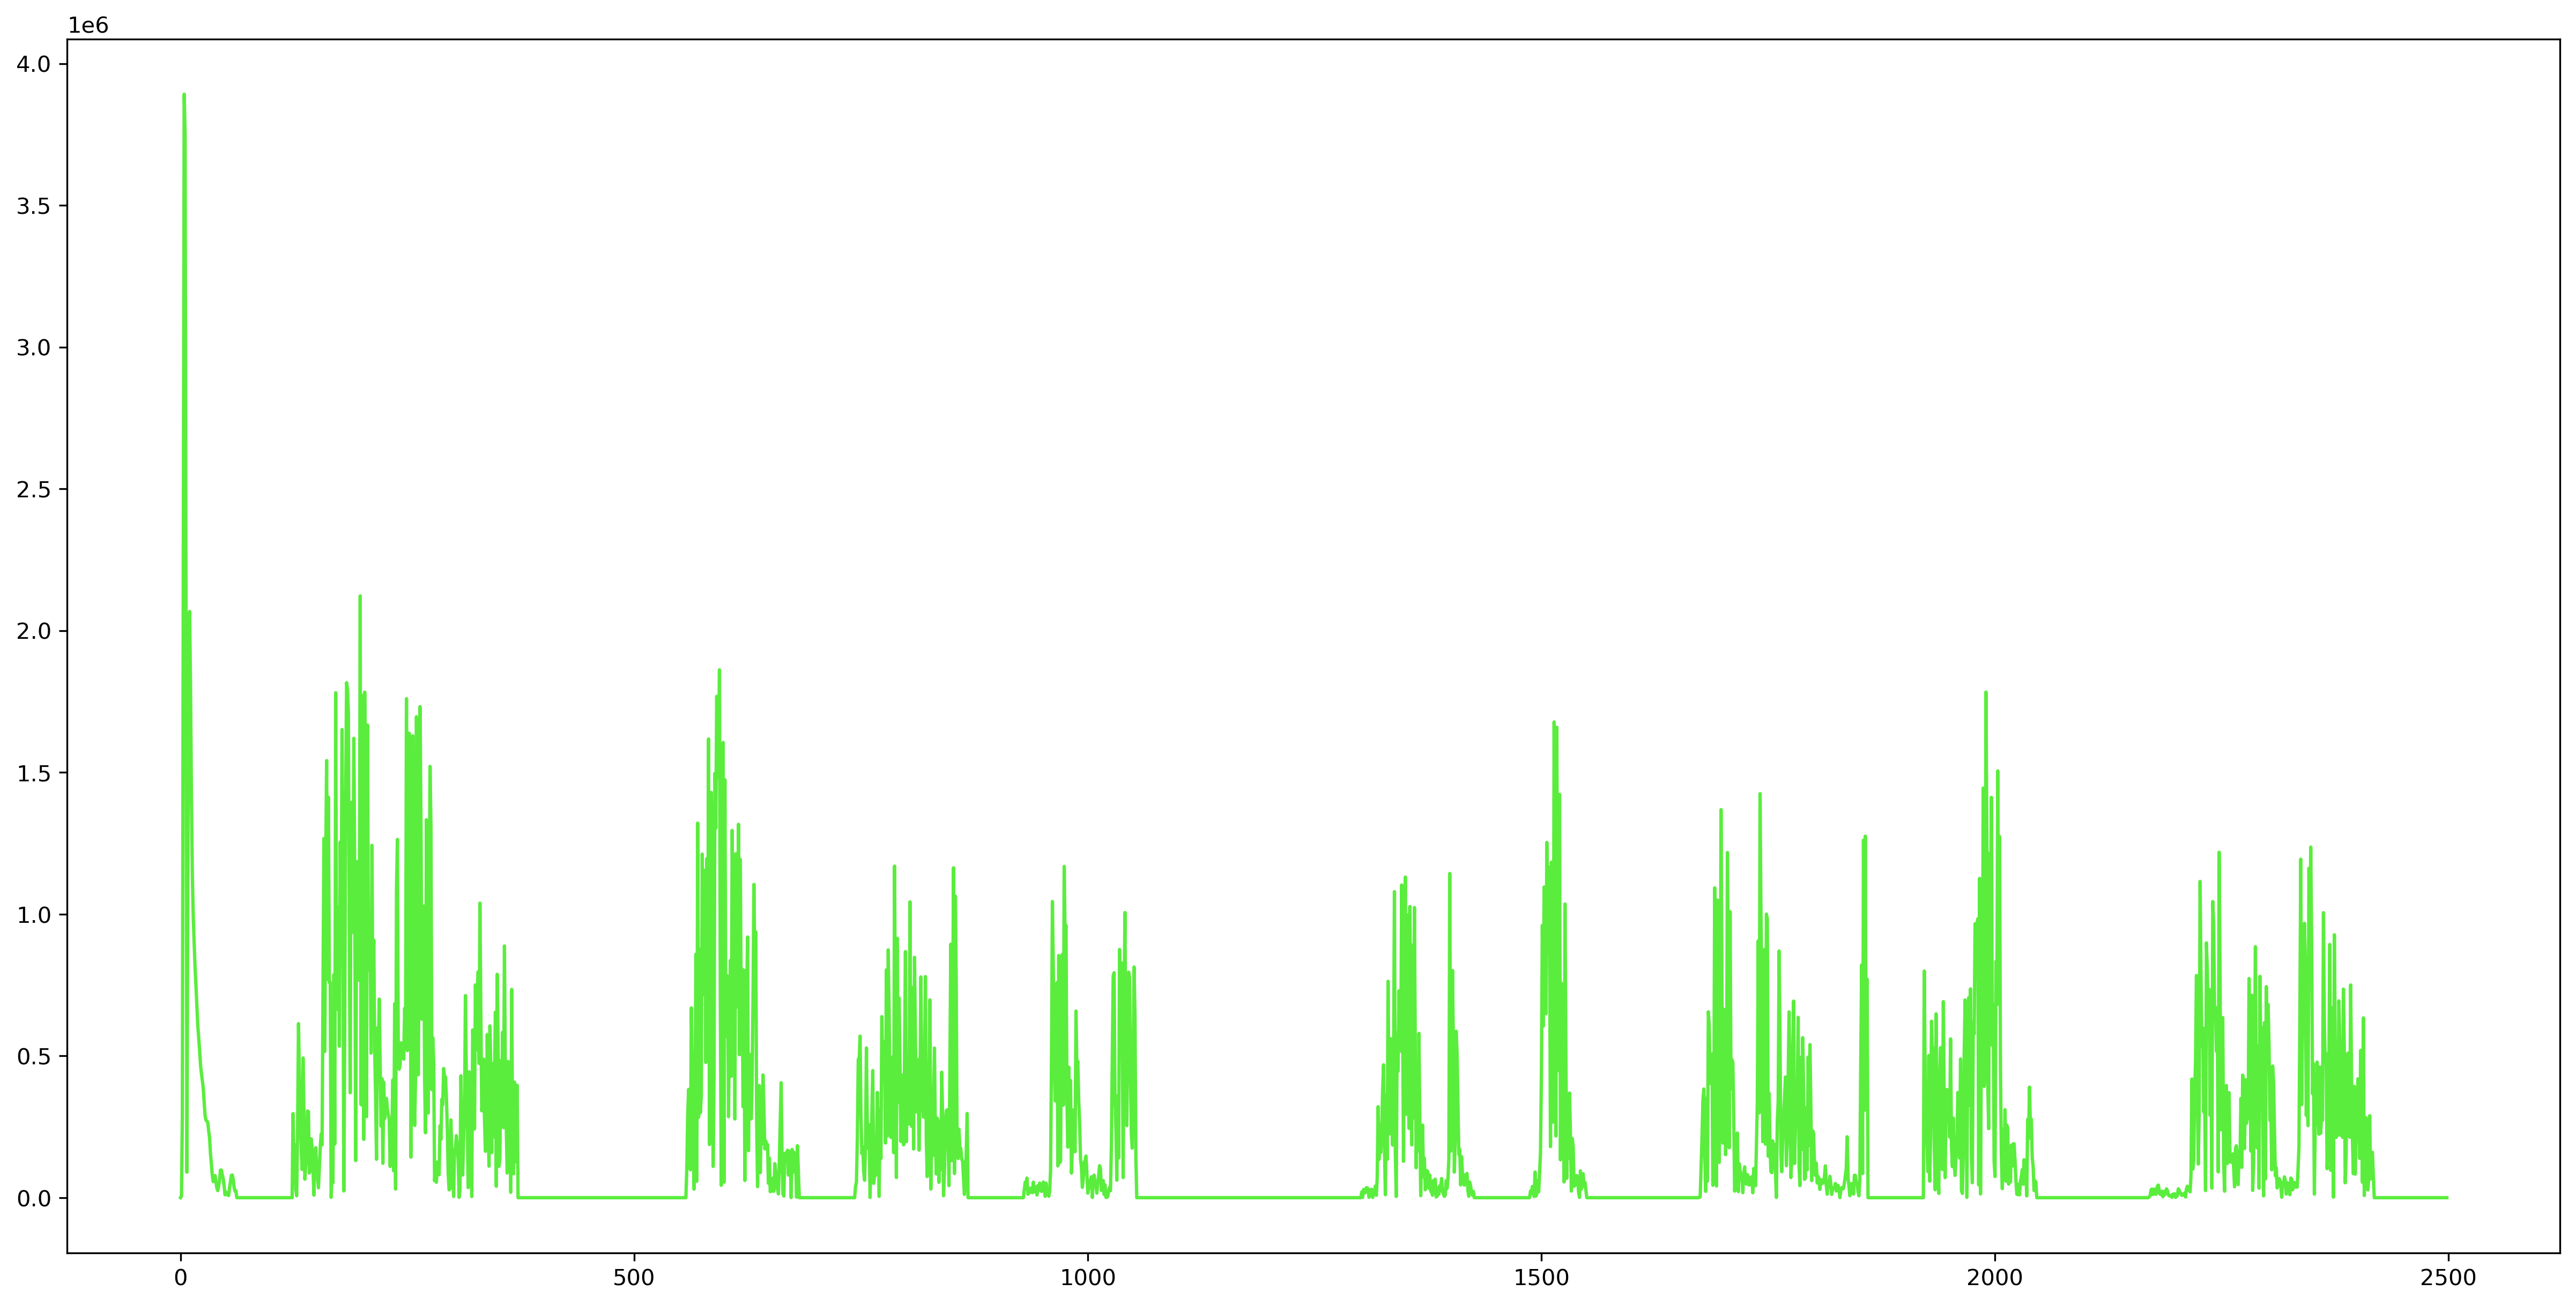

In [70]:
plt.plot(F0, color='#5AED3D')

## <a name ="id2"> Построение траектории второй, третьей и четвертой формантных частот </a>

Вторая формантная частота

In [31]:
F1 = []
i = 1
while i < round(len(F0)/2)-1:
    cur_max = max([F0[2*i-1],F0[2*i],F0[2*i+1]])
    if F0[i] > 2*cur_max:
        F1 += [cur_max]
    else:
        F1 += [0]
    i += 1

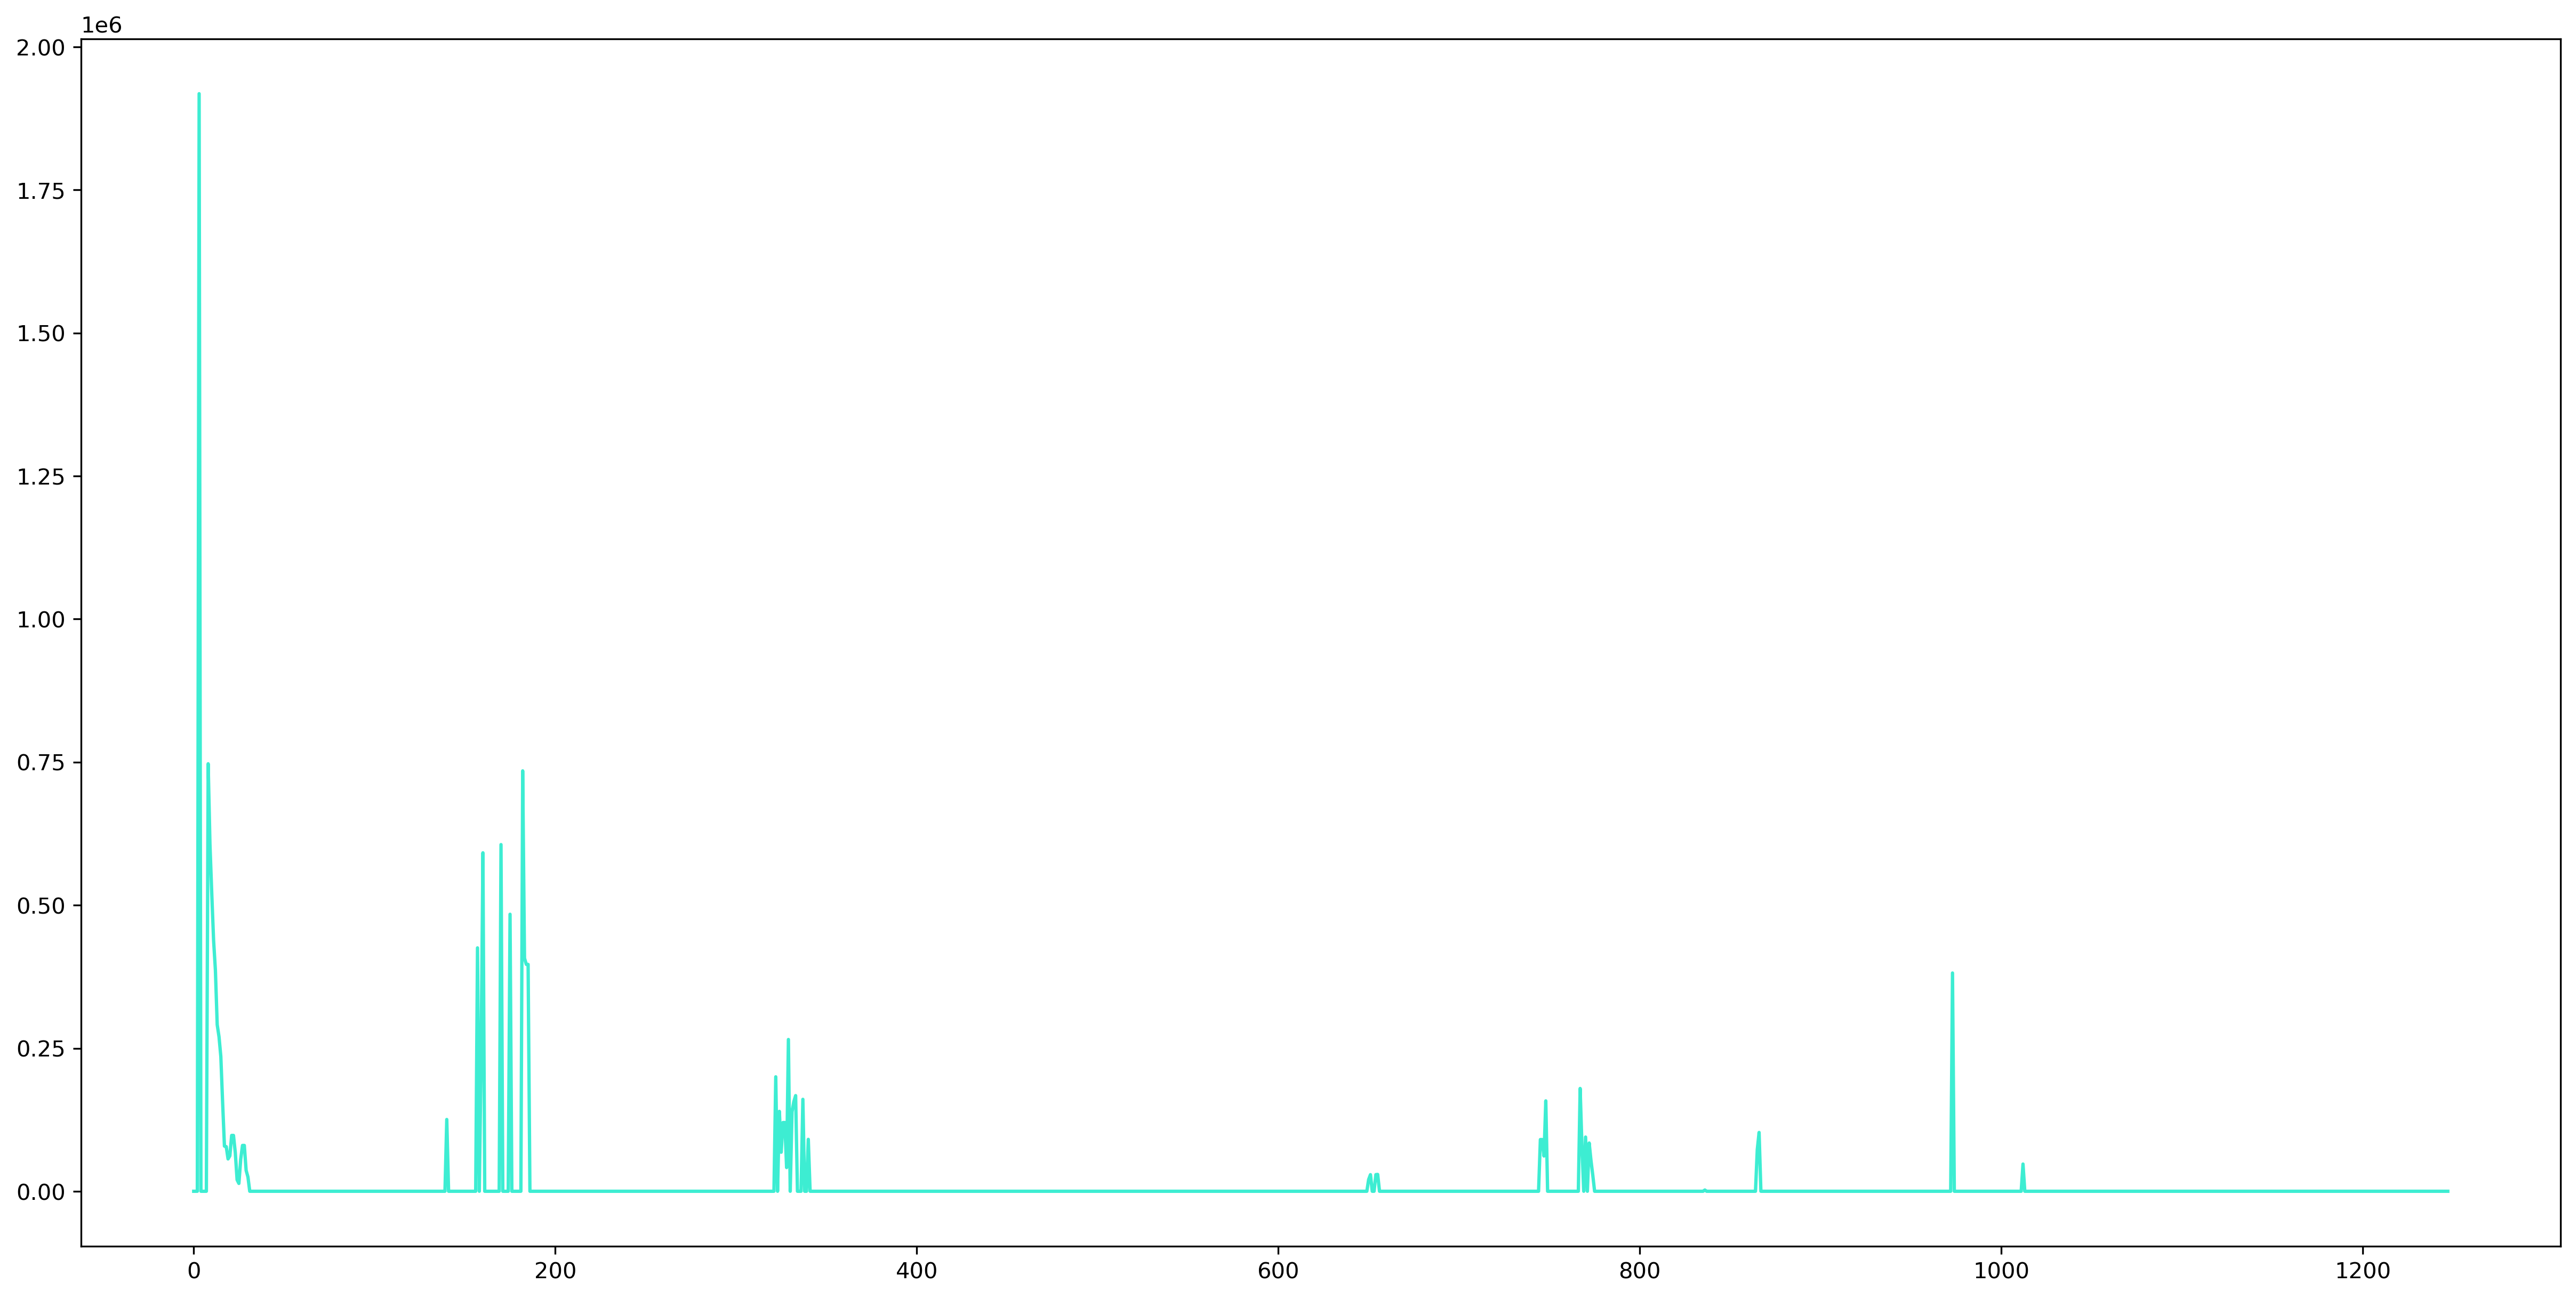

In [71]:
plt.plot(F1,color='#3DEDD2')

Третья формантная частота:

In [33]:
F2 = []
i = 1
while i < round(len(F0)/3)-1:
    cur_max = max([F0[3*i-1],F0[3*i],F0[3*i+1]])
    if F0[i] > 4*cur_max:
        F2 += [cur_max]
    else:
        F2 += [0]
    i += 1

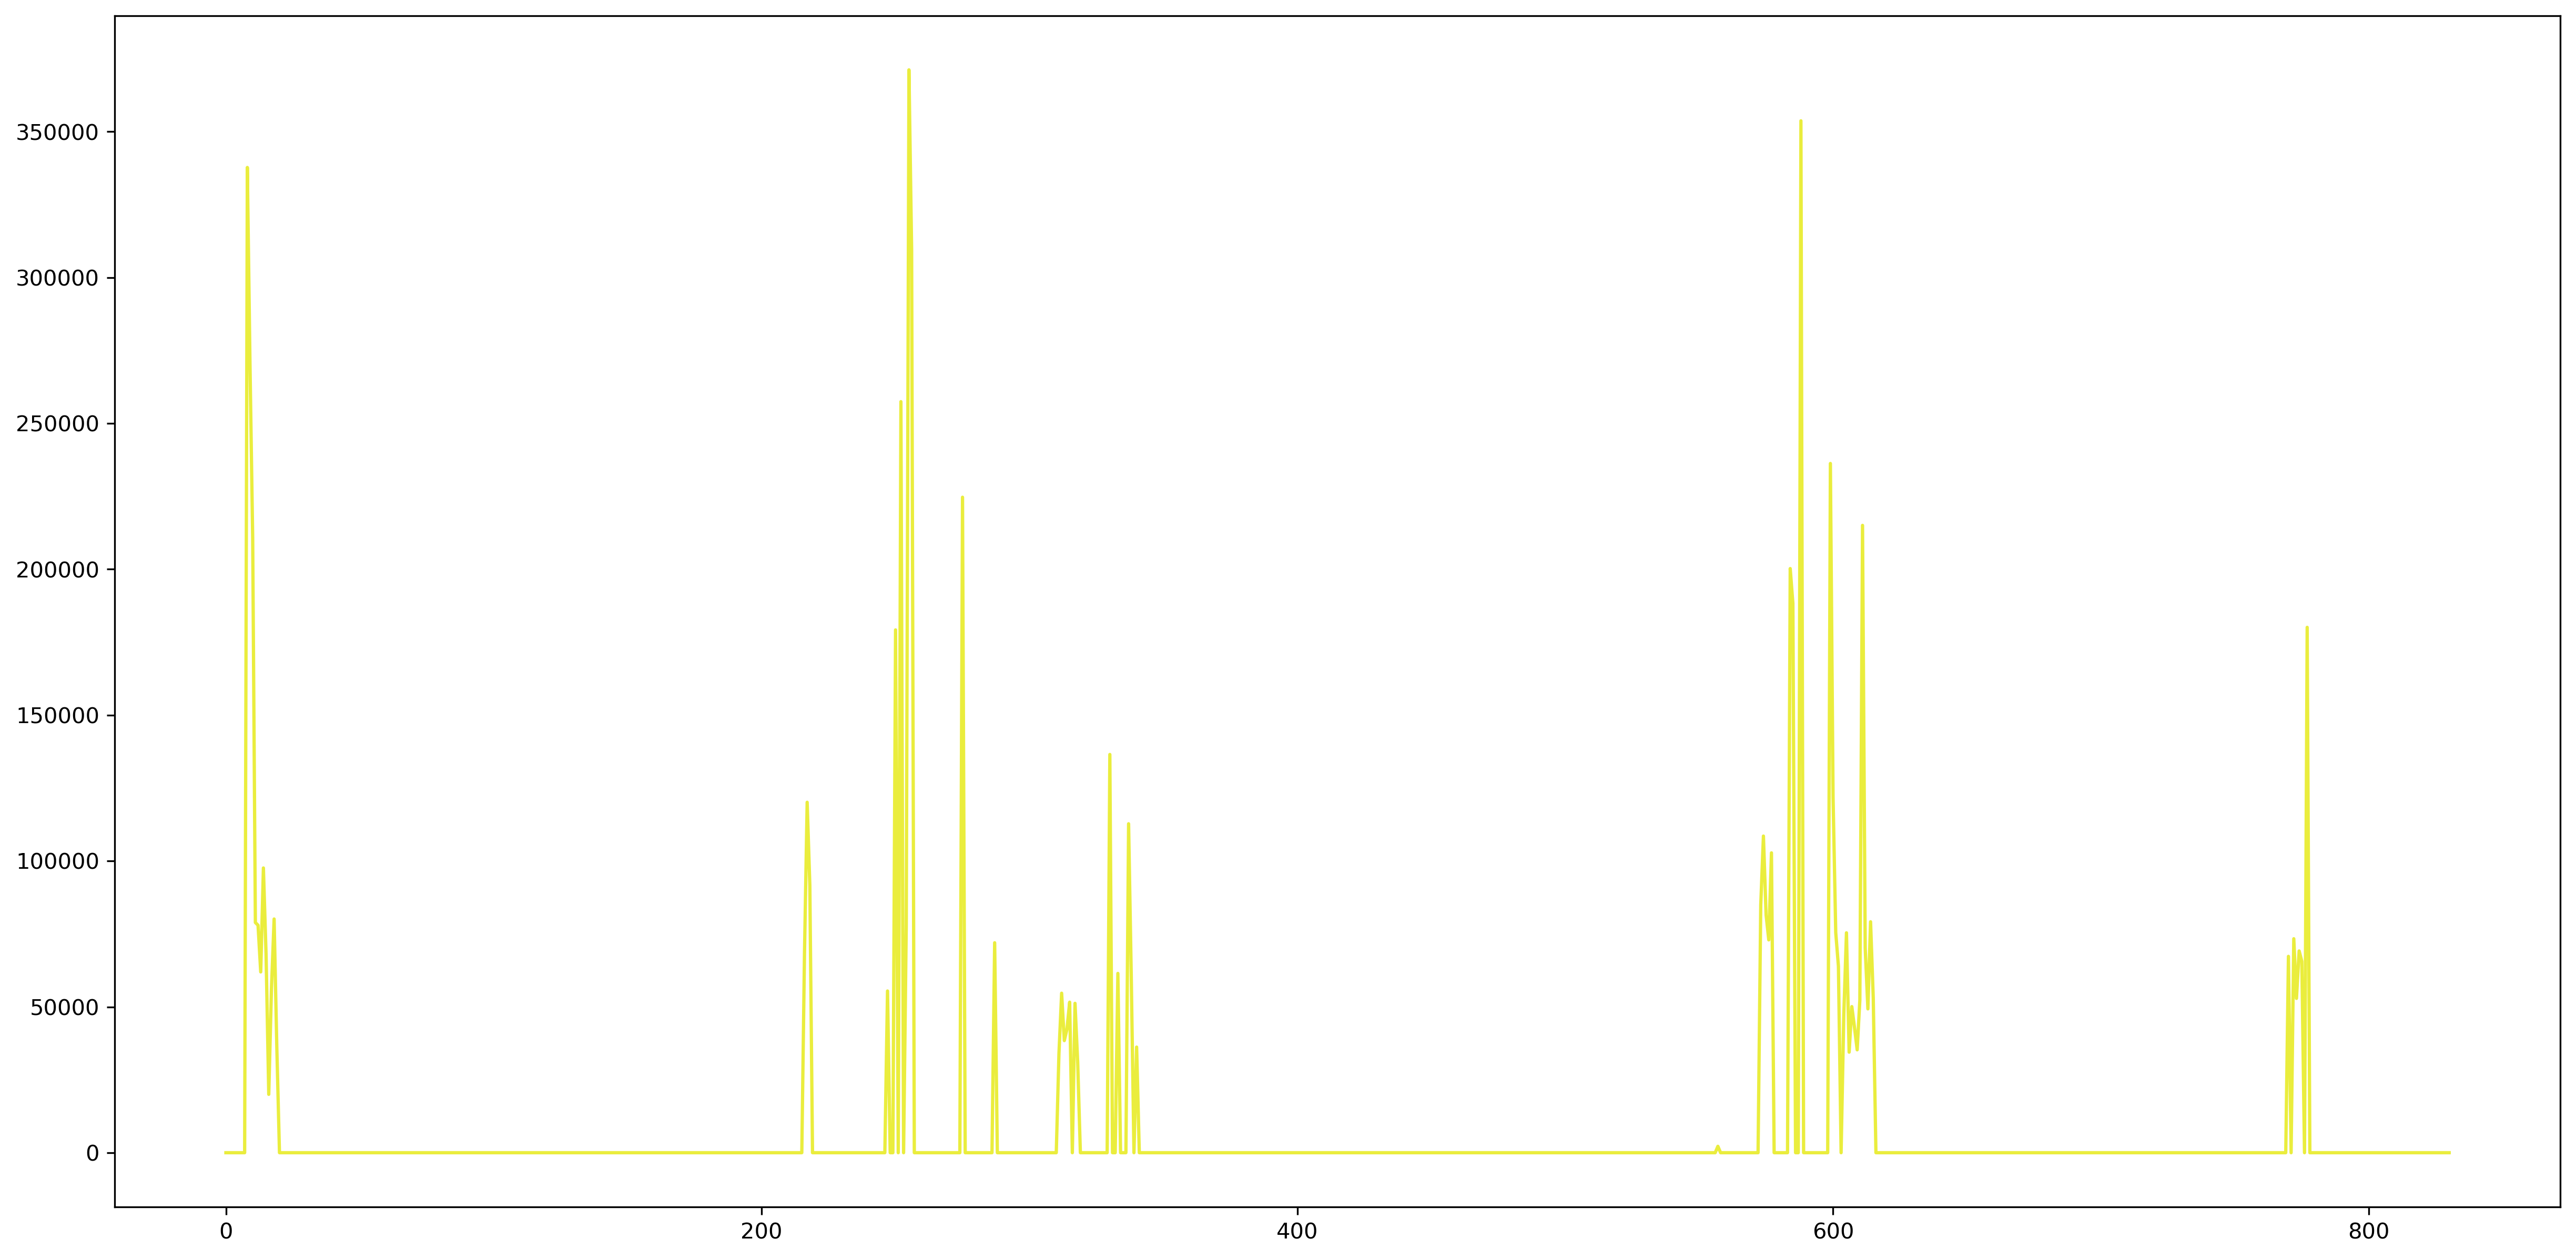

In [72]:
plt.plot(F2, color='#EAED3D')

Четвертая формантная частота:

In [35]:
F3 = []
i = 1
while i < round(len(F0)/4)-1:
    cur_max = max([F0[4*i-1],F0[4*i],F0[4*i+1]])
    if F0[i] > 8*cur_max:
        F3 += [cur_max]
    else:
        F3 += [0]
    i += 1

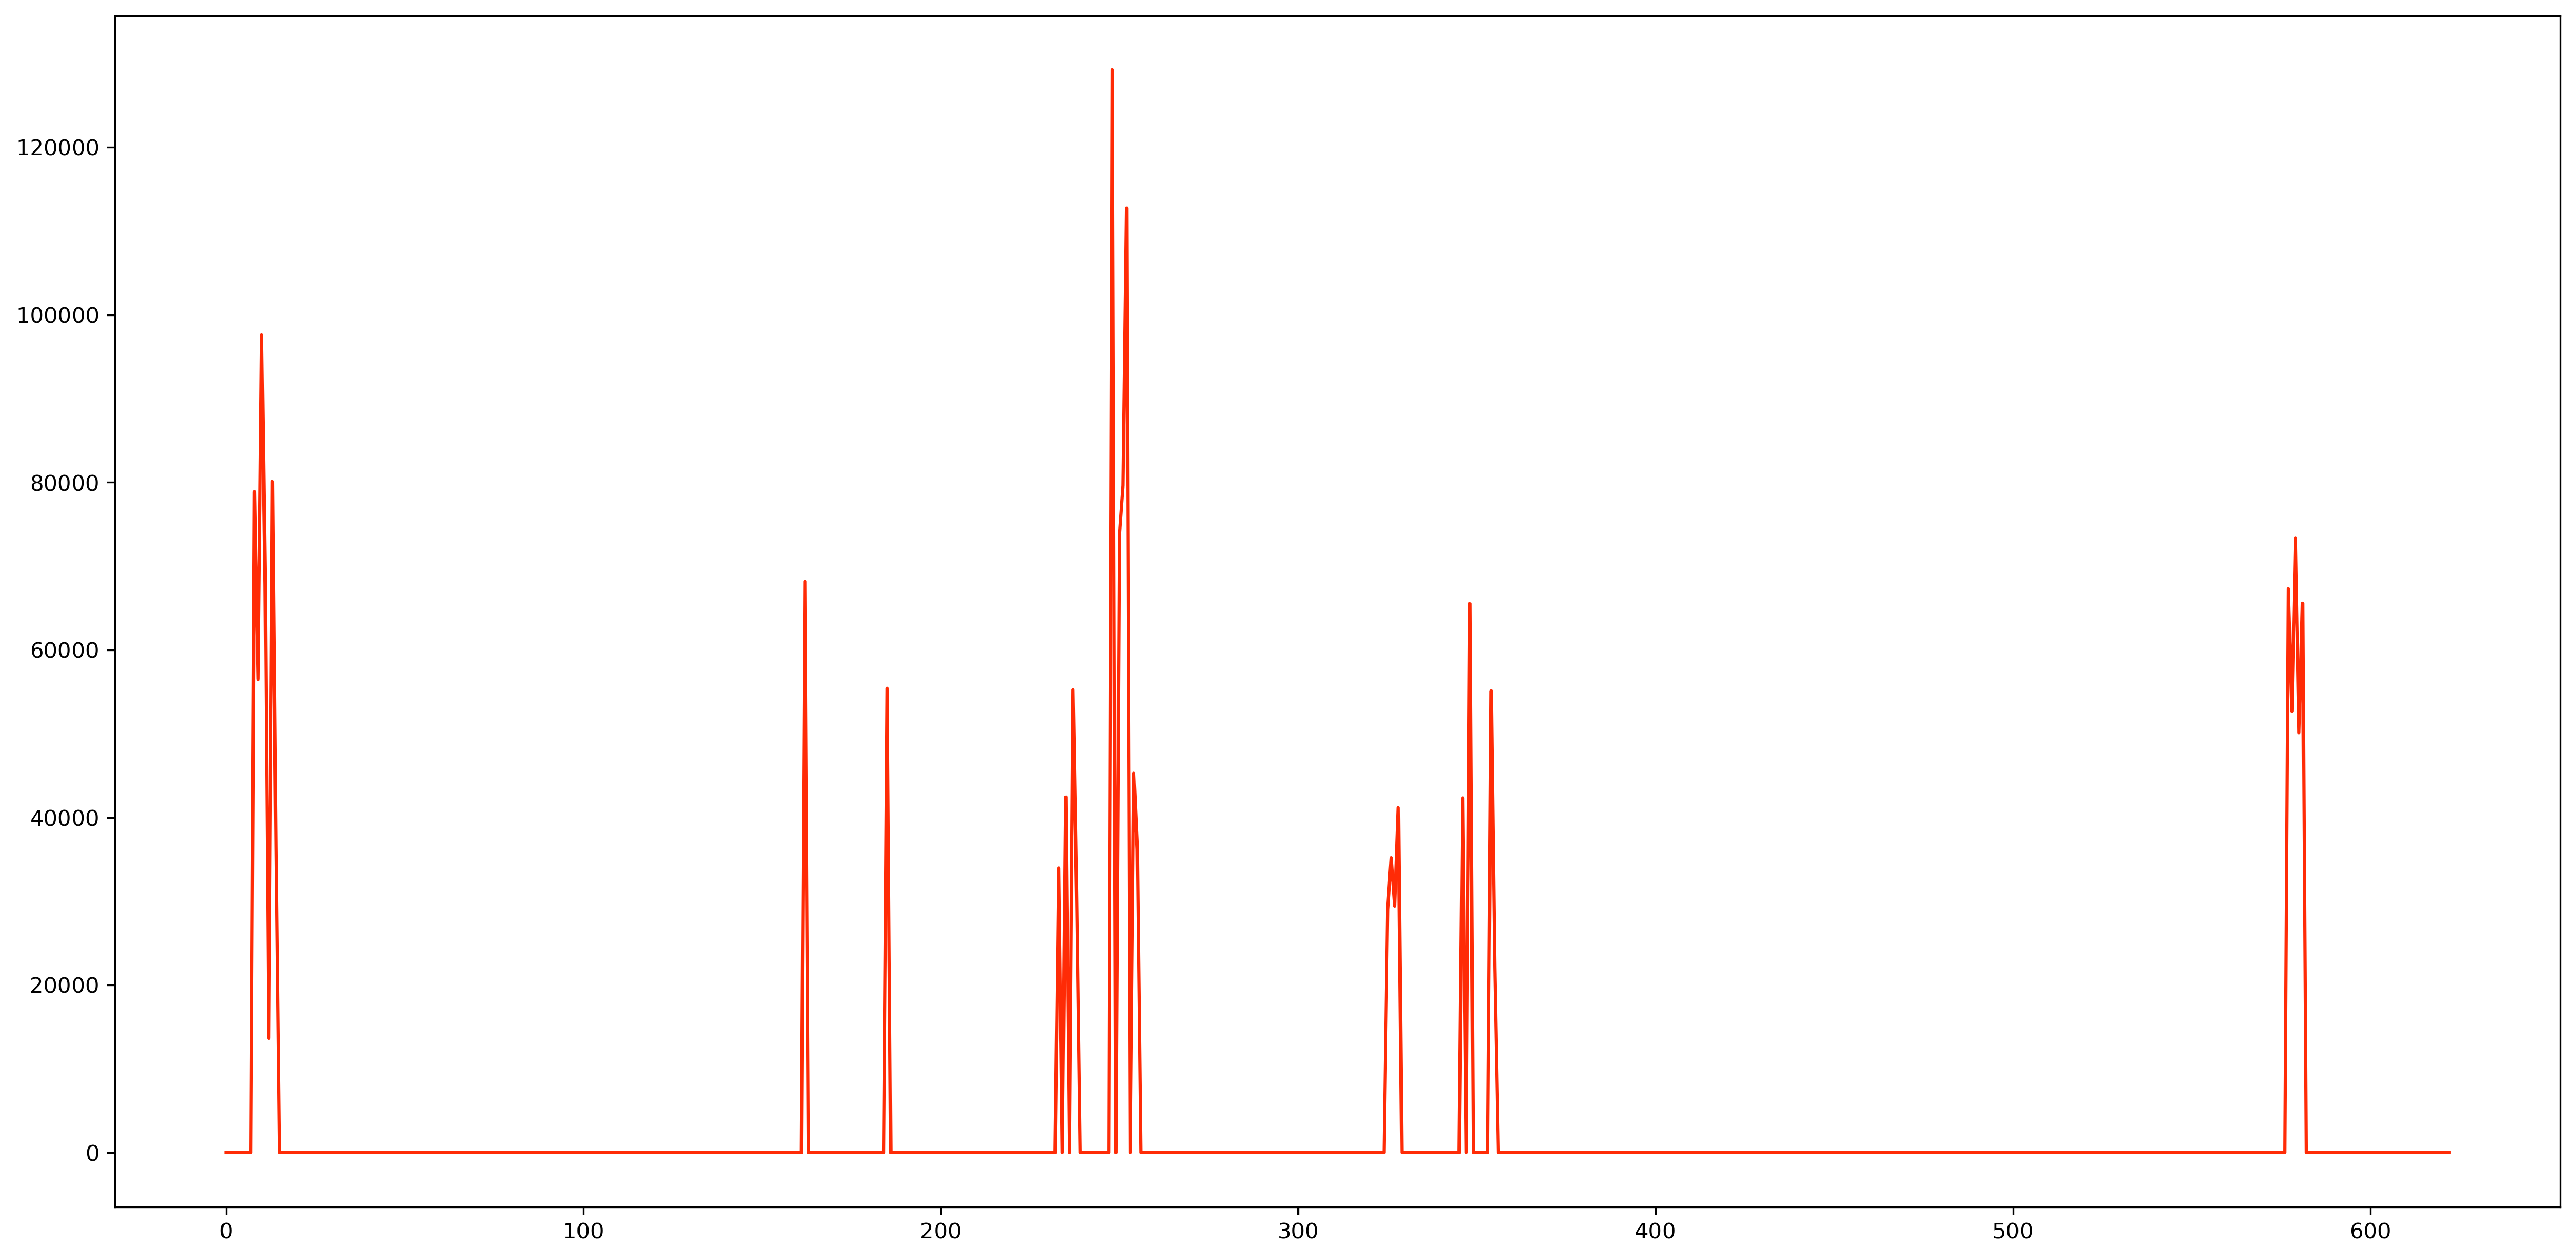

In [73]:
plt.plot(F3,color='#FF2B06')

## <a name ="id3"> Построение сонограммы </a>

Сгладим значения в начале, т.к. там есть максимумы, которые больше нигде не достигаются в сигнале. Если их оставить то желтым цветом будут помечены значения в начале, а все остальные будут иметь приблизительно равные цвета.

In [68]:
for i in arrs:
    for j in range(len(i)):
        if i[j] > 3.7e6:
            i[j] = 0

import plotly.express as px
print([max(i) for i in arrs])
plot_arr = np.array(arrs[:-1], dtype=float)
fig = px.imshow(plot_arr)
fig.show()

[2202127.233173684, 461981.51427690976, 1816237.9667932468, 2122453.563159307, 1759839.68310425, 1038918.9393268854, 589609.1692475076, 60069.67192738491, 580130.2725328725, 1861713.2957037971, 1104821.7282965293, 909402.6484875287, 1169521.6454971274, 1163530.7866656552, 755257.157873903, 1168398.9611027732, 1005693.7857141419, 916989.9834119552, 488379.4891860737, 440070.14046250004, 66710.96985478977, 1130957.8846829236, 1143519.8722809637, 780041.391217941, 1677978.1908932105, 961886.7503132556, 940297.6237274939, 1368583.432779112, 1424999.1877831866, 1275033.9821161074, 864500.6035084194, 1126210.6397030314, 1783123.9812294424, 231882.47539724768, 58374.55487872075, 1115564.4099074118, 1218485.4989020017, 1236549.1589465905, 1005288.8408352653, 319145.5053612645, 417548.9273566894]


 ## Выводы

Была построена траектория основного тона используя ДПФ. Также были построены траектории для второй, третьей и четвертой формантных частот. Построена сонограмма.